In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [5]:
menarche = pd.read_csv('/content/menarche_HR.csv')

In [6]:
menarche.shape

(25, 4)

In [7]:
menarche.drop('Unnamed: 0', axis = 1, inplace=True)
menarche

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,NaN
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,NaN
9,12.33,93.0,29.0


In [8]:
menarche.corr()

,Age,Total,Menarche
Age,1.000000,0.369303,0.662988
Total,0.369303,1.000000,0.921431
Menarche,0.662988,0.921431,1.000000


In [9]:
menarche.isna().sum()

Age         4
Total       2
Menarche    3
dtype: int64

In [10]:
menarche.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       21 non-null     float64
 1   Total     23 non-null     float64
 2   Menarche  22 non-null     float64
dtypes: float64(3)
memory usage: 728.0 bytes


**Missing value imputation using KNN**

In [11]:
import pandas as pd
from sklearn.impute import KNNImputer


menarche_filled = menarche.copy()

knn_imputer = KNNImputer(n_neighbors=5)

menarche_filled[:] = knn_imputer.fit_transform(menarche_filled)

menarche_filled

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,87.4
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,69.6
9,12.33,93.0,29.0


In [12]:
menarche_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       25 non-null     float64
 1   Total     25 non-null     float64
 2   Menarche  25 non-null     float64
dtypes: float64(3)
memory usage: 728.0 bytes


In [13]:
menarche_filled

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,87.4
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,69.6
9,12.33,93.0,29.0


In [14]:
menarche_filled['Percentage'] = (menarche_filled['Menarche']/menarche_filled['Total'])*100

In [15]:
menarche_filled

,Age,Total,Menarche,Percentage
0,9.21,376.0,0.0,0.000000
1,10.21,200.0,0.0,0.000000
2,10.58,93.0,0.0,0.000000
3,10.83,120.0,87.4,72.833333
4,11.08,90.0,2.0,2.222222
5,11.33,88.0,5.0,5.681818
6,11.58,105.0,10.0,9.523810
7,11.83,111.0,17.0,15.315315
8,12.08,100.0,69.6,69.600000
9,12.33,93.0,29.0,31.182796


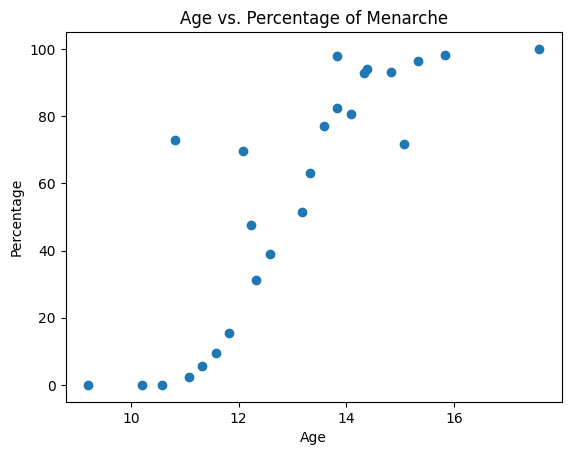

In [16]:
# Plotting a scatter plot
plt.scatter(menarche_filled['Age'], menarche_filled['Percentage'])
plt.title('Age vs. Percentage of Menarche')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

In [17]:
menarche_dropped = menarche.dropna(subset=['Age','Total'],how='all')
menarche_dropped

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,NaN
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,NaN
9,12.33,93.0,29.0


Age: Shapiro-Wilk Test - p-value: 0.9966978430747986
The Age column appears to be normally distributed.


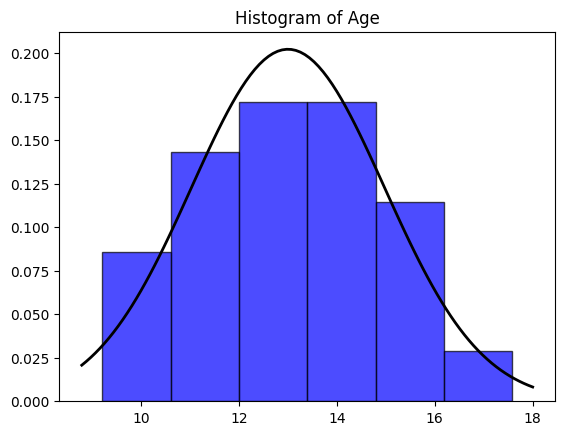



Total: Shapiro-Wilk Test - p-value: 1.4918219992665627e-09
The Total column does not appear to be normally distributed.


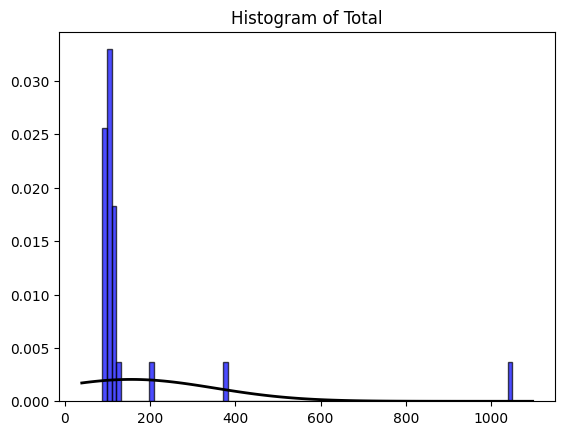



Menarche: Shapiro-Wilk Test - p-value: 2.404568322234013e-09
The Menarche column does not appear to be normally distributed.


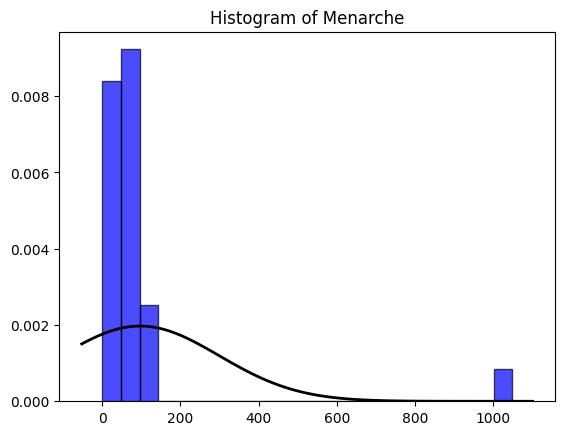



Percentage: Shapiro-Wilk Test - p-value: 0.004177577793598175
The Percentage column does not appear to be normally distributed.


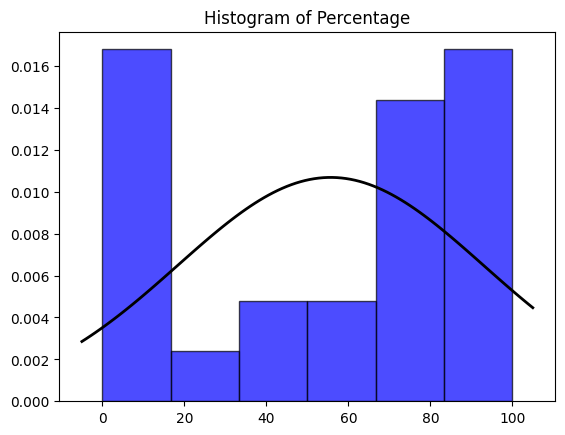

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm


for column in menarche_filled.columns:

    plt.hist(menarche_filled[column], bins='auto', alpha=0.7, color='blue', edgecolor='black', density=True)
    plt.title(f'Histogram of {column}')


    mu, std = menarche_filled[column].mean(), menarche_filled[column].std()
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)


    plt.plot(x, p, 'k', linewidth=2)


    stat, p_value = shapiro(menarche_filled[column])


    print(f'{column}: Shapiro-Wilk Test - p-value: {p_value}')


    if p_value > 0.05:
        print(f'The {column} column appears to be normally distributed.')
    else:
        print(f'The {column} column does not appear to be normally distributed.')

    plt.show()
    print('\n' + '='*50 + '\n')



**Missing value imputation using Linear Regression**

In [19]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
import missingno as msno

df_new = menarche.copy()
for column in menarche.columns:
    if df_new[column].isnull().any():

        X = df_new.drop([column], axis=1)
        y = df_new[column]


        imputer = SimpleImputer(strategy="mean")
        X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


        X_train = X[~y.isnull()]
        y_train = y[~y.isnull()]
        X_test = X[y.isnull()]


        model = LinearRegression()
        model.fit(X_train, y_train)


        predictions = model.predict(X_test)


        df_new.loc[df_new[column].isnull(), column] = predictions


print("\nImputed Dataset:")
print(df_new)


Imputed Dataset:
          Age        Total     Menarche
0    9.210000   376.000000     0.000000
1   10.210000   200.000000     0.000000
2   10.580000    93.000000     0.000000
3   10.830000   120.000000   -25.518730
4   11.080000    90.000000     2.000000
5   11.330000    88.000000     5.000000
6   11.580000   105.000000    10.000000
7   11.830000   111.000000    17.000000
8   12.080000   100.000000     9.113025
9   12.330000    93.000000    29.000000
10  12.580000   100.000000    39.000000
11  12.083772   136.756116    51.000000
12  12.867124    99.000000    47.000000
13  13.330000   106.000000    67.000000
14  13.580000   105.000000    81.000000
15  13.830000   114.402818    88.000000
16  14.080000    98.000000    79.000000
17  14.330000    97.000000    90.000000
18  13.781770   120.000000   113.000000
19  14.830000   102.000000    95.000000
20  15.080000   122.000000   149.580466
21  15.330000   111.000000   107.000000
22  13.759500    94.000000    92.000000
23  15.830000   114.00

**Missing Value Imputation Using Mean**

In [20]:
menarche_mean_filled = menarche.copy()
menarche_mean_filled = menarche_mean_filled.fillna(menarche_mean_filled.mean())
menarche_mean_filled

,Age,Total,Menarche
0,9.210000,376.000000,0.000000
1,10.210000,200.000000,0.000000
2,10.580000,93.000000,0.000000
3,10.830000,120.000000,98.772727
4,11.080000,90.000000,2.000000
5,11.330000,88.000000,5.000000
6,11.580000,105.000000,10.000000
7,11.830000,111.000000,17.000000
8,12.080000,100.000000,98.772727
9,12.330000,93.000000,29.000000


In [21]:
menarche_mean_filled['Percentage'] = (menarche_mean_filled['Menarche']/menarche_mean_filled['Total'])*100
menarche_mean_filled

,Age,Total,Menarche,Percentage
0,9.210000,376.000000,0.000000,0.000000
1,10.210000,200.000000,0.000000,0.000000
2,10.580000,93.000000,0.000000,0.000000
3,10.830000,120.000000,98.772727,82.310606
4,11.080000,90.000000,2.000000,2.222222
5,11.330000,88.000000,5.000000,5.681818
6,11.580000,105.000000,10.000000,9.523810
7,11.830000,111.000000,17.000000,15.315315
8,12.080000,100.000000,98.772727,98.772727
9,12.330000,93.000000,29.000000,31.182796


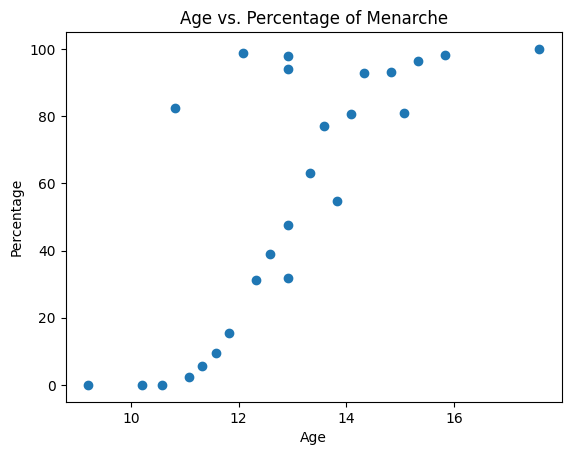

In [22]:

plt.scatter(menarche_mean_filled['Age'], menarche_mean_filled['Percentage'])
plt.title('Age vs. Percentage of Menarche')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

**Dropping rows which has missing values**

In [23]:
menarche_dropped = menarche.copy()
menarche_dropped = menarche_dropped.dropna()
menarche_dropped

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
9,12.33,93.0,29.0
10,12.58,100.0,39.0
13,13.33,106.0,67.0


In [24]:
menarche_dropped['Percentage'] = (menarche_dropped['Menarche']/menarche_dropped['Total'])*100
menarche_dropped

,Age,Total,Menarche,Percentage
0,9.21,376.0,0.0,0.000000
1,10.21,200.0,0.0,0.000000
2,10.58,93.0,0.0,0.000000
4,11.08,90.0,2.0,2.222222
5,11.33,88.0,5.0,5.681818
6,11.58,105.0,10.0,9.523810
7,11.83,111.0,17.0,15.315315
9,12.33,93.0,29.0,31.182796
10,12.58,100.0,39.0,39.000000
13,13.33,106.0,67.0,63.207547


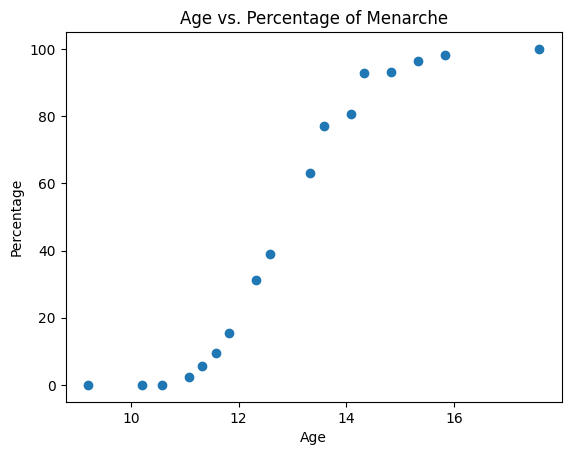

In [25]:

plt.scatter(menarche_dropped['Age'], menarche_dropped['Percentage'])
plt.title('Age vs. Percentage of Menarche')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

***Filling age column with simple for loop***

In [26]:
df_age_filling = menarche.copy()
df_age_filling

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,NaN
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,NaN
9,12.33,93.0,29.0


In [31]:
for index, value in enumerate(df_age_filling['Age']):
    if pd.isna(value):
        df_age_filling.at[index, 'Age'] = df_age_filling.at[index - 1, 'Age'] + 0.25
df_age_filling['Age']


0      9.21
1     10.21
2     10.58
3     10.83
4     11.08
5     11.33
6     11.58
7     11.83
8     12.08
9     12.33
10    12.58
11    12.83
12    13.08
13    13.33
14    13.58
15    13.83
16    14.08
17    14.33
18    14.58
19    14.83
20    15.08
21    15.33
22    15.58
23    15.83
24    17.58
Name: Age, dtype: float64

In [33]:
df_age_filling

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
3,10.83,120.0,NaN
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
8,12.08,100.0,NaN
9,12.33,93.0,29.0


***Linear regression after filling ages with for loop***



In [35]:
# Linear regression model
model = LinearRegression()

# Handling missing values (NaN) using SimpleImputer
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_age_filling), columns=df_age_filling.columns)

# Splitting the data into features (X) and target variable (y)
X = df_imputed[['Age']]
y = df_imputed['Total']

# Fit the model
model.fit(X, y)

# Predicting values
new_data = np.array([[16.08], [16.33]])
predicted_values = model.predict(new_data)

# Display the predicted values
print("Predicted values:")
print(predicted_values)

Predicted values:
[251.8180042  259.47446705]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [38]:
df_age_filling.corr()

,Age,Total,Menarche
Age,1.000000,0.321613,0.628793
Total,0.321613,1.000000,0.921431
Menarche,0.628793,0.921431,1.000000


In [41]:
df_age_filling_with_nan = df_age_filling[df_age_filling.isna().any(axis=1)]
df_age_filling_with_nan

,Age,Total,Menarche
3,10.83,120.0,NaN
8,12.08,100.0,NaN
11,12.83,NaN,51.0
15,13.83,NaN,88.0
20,15.08,122.0,NaN


In [43]:
df_age_filling_without_nan = df_age_filling.dropna()
df_age_filling_without_nan

,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
9,12.33,93.0,29.0
10,12.58,100.0,39.0
12,13.08,99.0,47.0


In [44]:
df_age_filling_without_nan['Percentage'] = (df_age_filling_without_nan['Menarche']/df_age_filling_without_nan['Total'])*100
df_age_filling_without_nan

<ipython-input-44-35dcc796d72b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filling_without_nan['Percentage'] = (df_age_filling_without_nan['Menarche']/df_age_filling_without_nan['Total'])*100


,Age,Total,Menarche,Percentage
0,9.21,376.0,0.0,0.000000
1,10.21,200.0,0.0,0.000000
2,10.58,93.0,0.0,0.000000
4,11.08,90.0,2.0,2.222222
5,11.33,88.0,5.0,5.681818
6,11.58,105.0,10.0,9.523810
7,11.83,111.0,17.0,15.315315
9,12.33,93.0,29.0,31.182796
10,12.58,100.0,39.0,39.000000
12,13.08,99.0,47.0,47.474747


In [45]:
df_age_filling_without_nan.corr()

,Age,Total,Menarche,Percentage
Age,1.000000,0.331653,0.630810,0.943691
Total,0.331653,1.000000,0.921431,0.168837
Menarche,0.630810,0.921431,1.000000,0.447174
Percentage,0.943691,0.168837,0.447174,1.000000


***Linear regression :- predicting percentage on age***

In [47]:
new_model = LinearRegression()

X = df_age_filling_without_nan[['Age']]
y = df_age_filling_without_nan['Percentage']

new_model.fit(X,y)

df_age_filling_with_nan['Percentage'] = new_model.predict(df_age_filling_with_nan[['Age']])
df_age_filling_with_nan

<ipython-input-47-d9ace6d278fc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filling_with_nan['Percentage'] = new_model.predict(df_age_filling_with_nan[['Age']])


,Age,Total,Menarche,Percentage
3,10.83,120.0,NaN,10.837486
8,12.08,100.0,NaN,33.189826
11,12.83,NaN,51.0,46.601231
15,13.83,NaN,88.0,64.483103
20,15.08,122.0,NaN,86.835444


In [50]:
for index, value in df_age_filling_with_nan.iterrows():
    if pd.isna(value['Total']):
        df_age_filling_with_nan.at[index, 'Total'] = int((df_age_filling_with_nan.at[index, 'Menarche']/df_age_filling_with_nan.at[index, 'Percentage'])*100)
df_age_filling_with_nan

,Age,Total,Menarche,Percentage
3,10.83,120.0,NaN,10.837486
8,12.08,100.0,NaN,33.189826
11,12.83,109.0,51.0,46.601231
15,13.83,136.0,88.0,64.483103
20,15.08,122.0,NaN,86.835444


In [51]:
for index, value in df_age_filling_with_nan.iterrows():
    if pd.isna(value['Menarche']):
        df_age_filling_with_nan.at[index, 'Menarche'] = int((df_age_filling_with_nan.at[index, 'Total']*df_age_filling_with_nan.at[index, 'Percentage'])/100)
df_age_filling_with_nan

,Age,Total,Menarche,Percentage
3,10.83,120.0,13.0,10.837486
8,12.08,100.0,33.0,33.189826
11,12.83,109.0,51.0,46.601231
15,13.83,136.0,88.0,64.483103
20,15.08,122.0,105.0,86.835444


In [63]:
merged_age_filling = pd.merge(df_age_filling_without_nan, df_age_filling_with_nan, how='outer')
merged_age_filling

,Age,Total,Menarche,Percentage
0,9.21,376.0,0.0,0.000000
1,10.21,200.0,0.0,0.000000
2,10.58,93.0,0.0,0.000000
3,11.08,90.0,2.0,2.222222
4,11.33,88.0,5.0,5.681818
5,11.58,105.0,10.0,9.523810
6,11.83,111.0,17.0,15.315315
7,12.33,93.0,29.0,31.182796
8,12.58,100.0,39.0,39.000000
9,13.08,99.0,47.0,47.474747


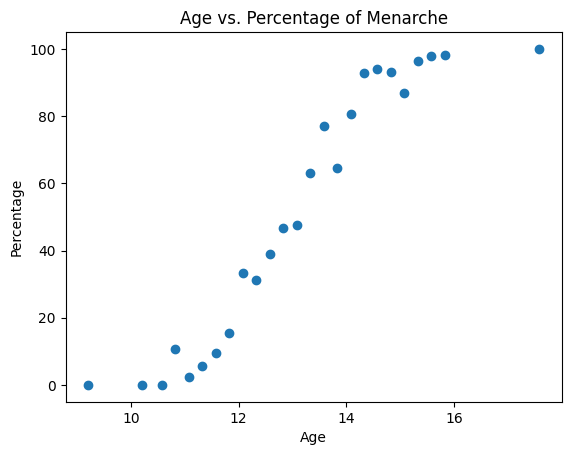

In [65]:
# Plotting a scatter plot
plt.scatter(merged_age_filling['Age'], merged_age_filling['Percentage'])
plt.title('Age vs. Percentage of Menarche')
plt.xlabel('Age')
plt.ylabel('Percentage')
plt.show()

***Using knn to predict the percentage values***

In [71]:
df_age_filling_with_knn_not_having_nan = df_age_filling.dropna()
df_age_filling_with_knn_not_having_nan


,Age,Total,Menarche
0,9.21,376.0,0.0
1,10.21,200.0,0.0
2,10.58,93.0,0.0
4,11.08,90.0,2.0
5,11.33,88.0,5.0
6,11.58,105.0,10.0
7,11.83,111.0,17.0
9,12.33,93.0,29.0
10,12.58,100.0,39.0
12,13.08,99.0,47.0


In [70]:
df_age_filling_with_knn_having_nan = df_age_filling[df_age_filling.isna().any(axis=1)]
df_age_filling_with_knn_having_nan

,Age,Total,Menarche
3,10.83,120.0,NaN
8,12.08,100.0,NaN
11,12.83,NaN,51.0
15,13.83,NaN,88.0
20,15.08,122.0,NaN


In [73]:
df_age_filling_with_knn_not_having_nan['Percentage'] = (df_age_filling_with_knn_not_having_nan['Menarche']/df_age_filling_with_knn_not_having_nan['Total'])*100
df_age_filling_with_knn_not_having_nan

<ipython-input-73-5d95b12f79e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filling_with_knn_not_having_nan['Percentage'] = (df_age_filling_with_knn_not_having_nan['Menarche']/df_age_filling_with_knn_not_having_nan['Total'])*100


,Age,Total,Menarche,Percentage
0,9.21,376.0,0.0,0.000000
1,10.21,200.0,0.0,0.000000
2,10.58,93.0,0.0,0.000000
4,11.08,90.0,2.0,2.222222
5,11.33,88.0,5.0,5.681818
6,11.58,105.0,10.0,9.523810
7,11.83,111.0,17.0,15.315315
9,12.33,93.0,29.0,31.182796
10,12.58,100.0,39.0,39.000000
12,13.08,99.0,47.0,47.474747


In [76]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor

X_train = df_age_filling_with_knn_not_having_nan[['Age']]
y_train = df_age_filling_with_knn_not_having_nan['Percentage']

knn_regressor = KNeighborsRegressor(n_neighbors=3)
knn_regressor.fit(X_train, y_train)

df_age_filling_with_knn_having_nan['Percentage'] = new_model.predict(df_age_filling_with_knn_having_nan[['Age']])
df_age_filling_with_knn_having_nan

<ipython-input-76-d2bb09e2190d>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_age_filling_with_knn_having_nan['Percentage'] = new_model.predict(df_age_filling_with_knn_having_nan[['Age']])


,Age,Total,Menarche,Percentage
3,10.83,120.0,NaN,10.837486
8,12.08,100.0,NaN,33.189826
11,12.83,NaN,51.0,46.601231
15,13.83,NaN,88.0,64.483103
20,15.08,122.0,NaN,86.835444


In [77]:
df_age_filling_with_nan

,Age,Total,Menarche,Percentage
3,10.83,120.0,13.0,10.837486
8,12.08,100.0,33.0,33.189826
11,12.83,109.0,51.0,46.601231
15,13.83,136.0,88.0,64.483103
20,15.08,122.0,105.0,86.835444
